## Лабораторная работа 3

### Решение систем линейных алгебраических уравнений прямыми методами. Теория возмущений

Вариант 29 (3.1.29, 3.3.8, 3.8.6)
БПМ 171 Четвериков Илья Сергеевич

In [158]:
import numpy as np
np.set_printoptions(suppress=True)
N = 29

### Задача 3.1.29

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешности правой части системы $b$.

1) Задание матрицы системы $A$ и вектора правой части $b$. Решение системы с помощью numpy.linalg.solve.

In [159]:
n = 6
c = lambda i, j: 0.1 * N * (i + 1) * (j + 1)
a = lambda x: 10/(0.3 * x ** 3 + 10 * x)

A = np.empty([n, n])
b = np.empty(n)
b.fill(N)
for i in range(n):
    for j in range(n):
        A[i,j] = a(c(i, j))

print("Matrix A:")
print(A)
print("Vector b")
print(b)

x = np.linalg.solve(A, b)
print("Solution x:")
print(x)

Matrix A:
[[0.27535542 0.08581216 0.0351431  0.01711541 0.00943763 0.00569993]
 [0.08581216 0.01711541 0.00569993 0.00251373 0.00131463 0.00076975]
 [0.0351431  0.00569993 0.00178735 0.00076975 0.00039795 0.00023152]
 [0.01711541 0.00251373 0.00076975 0.00032859 0.00016917 0.00009819]
 [0.00943763 0.00131463 0.00039795 0.00016917 0.00008692 0.0000504 ]
 [0.00569993 0.00076975 0.00023152 0.00009819 0.0000504  0.0000292 ]]
Vector b
[29. 29. 29. 29. 29. 29.]
Solution x:
[ 4.64242661e+06 -3.31513817e+09  1.63253281e+11 -1.63443017e+12
  4.81318758e+12 -4.01850302e+12]


2) Нахождение числа обусловленности матрицы A

In [160]:
cond = np.linalg.cond(A, p=np.inf)
print("Число обусловленности матрицы A:")
print(cond)

Число обусловленности матрицы A:
1107408330293.653


3) Нахождение относительных погрешностей решения $x^i$ системы $Ax^i=b^i$ при внесении погрешностей в каждую координату вектора $b$. Величина погрешности $\Delta=0.5$

In [161]:
delta = 0.5
d = np.empty(n)
b_err = np.empty(n)

for i in range(n):
    b_i = b.copy()
    b_i[i] += delta
    x_i = np.linalg.solve(A, b_i)
    
    d[i] = np.linalg.norm(x - x_i, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
    b_err[i] = np.linalg.norm(b - b_i, ord=np.inf) / np.linalg.norm(b, ord=np.inf)
    
print("Погрешности решения при внесении погрешности в каждую координату вектора правой части:")
print(d)

Погрешности решения при внесении погрешности в каждую координату вектора правой части:
[0.0000001  0.00008141 0.00408244 0.04113757 0.12151134 0.10161628]


4) Определение компоненты вектора правой части, оказывающие наибольщее влияние на решение

In [162]:
m = np.argmax(d) # from 0
print(m)

4


5) Оценка теоретической погрешности по формуле $\delta(x^{m}) \leq cond(A) \cdot \delta(b^{m})$. Сравнение с практической погрешностью

In [163]:
print("Граница теоретической погрешности:")
print(cond * b_err[m])
print("Практическая погрешность:")
print(d[m])

Граница теоретической погрешности:
19093247074.0285
Практическая погрешность:
0.12151133663079662


Вывод: максимальная теоретическая погрешность на несколько порядков больше полученной практической. Это объясняется большим числом обусловленности матрицы A, много большим единицы.

### Задача 3.3.8
Дана матрица A. Найти число обусловленности матрицы, используя вычислительный эксперимент.

1) Решить $k$ систем уравнений $Ax^i=b^i$,система векторов $b^i$ линейно независима  
2) Найти отношение $\frac{\|x^i\|}{\|b^i\|}$ для каждого $i \in 1,..,k$
3) Найти приближение нормы обратной матрицы $\|A^{-1}\|\approx \max_{1<i<k}\frac{\|x^i\|}{\|b^i\|}$   
4) Найти приближение числа обусловленности матрицы $A$: $cond(A)\approx\|A^{-1}\|\|A\|$

In [164]:
A = np.array([[1, 1, 1, 1],
[1, 2, 3, 4],
[1, 3, 6, 10],
[1, 4, 4, 20]])
k = 4 # максимум линейно независимых векторов
b_arr = np.array([[38, 28, -45, 34],
                  [4, 5, 6, 7],
                  [6, -5, 7, 8],
                  [0, 4, 20, 34]])
print("Ранг системы векторов b_i:")
print(np.linalg.matrix_rank(b_arr)) # проверка что вектора линейно независимы

A_inv_norm = 0
for b_i in b_arr:
    x_i = np.linalg.solve(A, b_i)
    ratio = np.linalg.norm(x_i, ord=np.inf) / np.linalg.norm(b_i, ord=np.inf)
    if ratio > A_inv_norm:
        A_inv_norm = ratio
        
A_norm = np.linalg.norm(A, ord=np.inf)
cond_app = A_inv_norm * A_norm
print("Число обусловленности:")
print("Найденное заданным приближением: {}.".format(cond_app))
print("Найденное встроенной функцией: {}.".format(np.linalg.cond(A, p=np.inf)))

Ранг системы векторов b_i:
4
Число обусловленности:
Найденное заданным приближением: 147.0986842105263.
Найденное встроенной функцией: 216.73684210526315.


### Задача 3.8.6

Дана система уравнений $Az(x)=b(x)$ порядка $n$. Построить график функции $y(x)=\sum_{i=1}^n z_i(x)$ на отрезке $[a, b]$ здесь $z(x)=(z_1(x), ..., z_n(x))^T$ - решение системы. Для решения системы уравнений использовать метод Гаусса (схема полного выбора).

#### Тестовый пример
$ x + 2y = 1, -x+2y = 3 => (x, y) = (-1, 1) $

Solution of the test:
[-1.  1.]


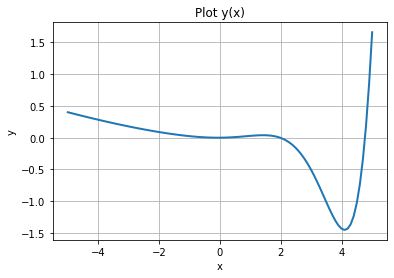

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

M = 6
n = 100

a = -5
b = 5

q = lambda M: 1.001 - 2 * M * 0.001

A = np.empty([n, n])
for i in range(n):
    for j in range(n):
        if i == j:
            A[i,j] = (q(M) - 1) ** (i + j + 2)
        else:
            A[i,j] = q(M) ** (i + j + 2) + 0.1 * (j - i)
            
def b_func(x, n):
    b = np.empty(n)
    for i in range(n):
        b[i] =  x * np.exp(x / (i+1) ) * np.cos(x / (i + 1) )
    return b

# Метод полного выбора.
# На очередном шаге для исключения переменного выбираем максимальный элемент в оставшейся подматрице
def solve_gauss(A, b):
    A_ = A.copy()
    b_ = b.copy()
    cols = []
    for j in range(A_.shape[1]):
        
        subA = abs(A_[j:,:])
        ind = np.unravel_index(np.argmax(subA, axis=None), subA.shape)
        cols.append(ind[1])
        if 0 != ind[0]:
            A_[[j, j + ind[0]]] = A_[[j + ind[0], j]]
            b_[[j, j + ind[0]]] = b_[[j + ind[0], j]]
        
        norm = A_[j, ind[1]]
        A_[j] = A_[j] / norm
        b_[j] = b_[j] / norm
        
        for i in range(j+1, A_.shape[0]):
            q = A_[i, ind[1]]
            A_[i] = A_[i] - q * A_[j]
            b_[i] = b_[i] - q * b_[j]
        
    x = np.zeros_like(b)
    it = A_.shape[0]-1
    
    for j in cols[::-1]:    
        x[j] = b_[it]
        for i in range(it):
            q = A_[i, j]
            A_[i] = A_[i] - q * A_[it]
            b_[i] = b_[i] - q * b_[it]
        it -= 1
        
    return x

# Решение тестового примера
T = np.array([[1,2], [-1,2]], dtype=float)
t = np.array([1, 3], dtype=float)
d = solve_gauss(T, t)
print("Solution of the test:")
print(d)

ab = np.linspace(a, b, n)
result = np.empty(len(ab))
for i in range(len(ab)):
    z = solve_gauss(A, b_func(ab[i], n))
    result[i] = z.sum()
    
plt.plot(ab, result, '-', lw=2)
plt.grid(True)
plt.title("Plot y(x)");
plt.xlabel("x");
plt.ylabel("y");